<a href="https://colab.research.google.com/github/nnhuy20130281/Lab_ML_NguyenNgocHuy/blob/main/Lab_7_20130281_NguyenNgocHuy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, ComplementNB, GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.decomposition import PCA
from sklearn.feature_selection  import SelectFromModel
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from prettytable import PrettyTable
from scipy.stats import mode
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'


Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [10]:
dataset = datasets.load_iris()
x = dataset.data
y = dataset.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

clf = svm.SVC(kernel='sigmoid', random_state=0)
accuracy = cross_validate(clf, x_train, y_train, scoring='accuracy', cv=10)
precision_macro = cross_validate(clf, x_train, y_train, scoring='precision_macro', cv=10)
recall = cross_validate(clf, x_train, y_train, scoring='recall_macro', cv=10)
f1_macro = cross_validate(clf, x_train, y_train, scoring='f1_macro', cv=10)
print(np.mean(accuracy['test_score']))
print(np.mean(precision_macro['test_score']))
print(np.mean(recall['test_score']))
print(np.mean(f1_macro['test_score']))

0.3318181818181818
0.11727272727272728
0.325
0.1704273504273504


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [11]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

importances = rf.feature_importances_
importances_sort = np.argsort(importances)[::-1]

select = SelectFromModel(rf, threshold=0.011)
x_train = select.fit_transform(x_train, y_train)
x_test = select.transform(x_test)

rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

accuracy = cross_validate(rf, x_train, y_train, scoring='accuracy', cv=cv)
precision_macro = cross_validate(rf, x_train, y_train, scoring='precision_macro', cv=cv)
recall = cross_validate(rf, x_train, y_train, scoring='recall_macro', cv=cv)
f1_macro = cross_validate(rf, x_train, y_train, scoring='f1_macro', cv=cv)

print(np.mean(accuracy['test_score']))
print(np.mean(precision_macro['test_score']))
print(np.mean(recall['test_score']))
print(np.mean(f1_macro['test_score']))

0.9527272727272728
0.9674603174603174
0.9572222222222223
0.9520105820105821


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [12]:
dataset = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.5)
     

from sklearn.cluster import KMeans
model = KMeans(n_clusters=10, random_state=0)
model.fit(x_train)
clusters = model.predict(x_test)
model.cluster_centers_.shape

from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, clusters))

from sklearn.metrics.cluster import completeness_score
print (completeness_score(y_test, clusters))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.10011123470522804
0.7763188978364621


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [13]:

labels = np.zeros_like(clusters)
for i in range(3):
 mask = (clusters == i)
 labels[mask] = mode(y_test[mask])[0]

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

gauss = GaussianNB()
gauss.fit(x_train, y_train)
gauss_pred = gauss.predict(x_test)

kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(x_train, y_train)
kNN_pred = kNN.predict(x_test)

t = PrettyTable(["Algorithm","Accuracy","Precision", "Recall", "F1"])
t.add_row(["K-Means", round(accuracy_score(y_test, labels), 2), 
           round(precision_score(y_test, labels, average='micro'), 2), 
           round(recall_score(y_test, labels, average='macro'), 2),
           round(f1_score(y_test, labels,average='macro'), 2)])
t.add_row(["Random forest", round(accuracy_score(y_test, rf_pred), 2), 
           round(precision_score(y_test, rf_pred, average='micro'), 2), 
           round(recall_score(y_test, rf_pred, average='macro'), 2),
           round(f1_score(y_test, rf_pred,average='macro'), 2)])
t.add_row(["Naive Bayes", round(accuracy_score(y_test, gauss_pred), 2), 
           round(precision_score(y_test, gauss_pred, average='micro'), 2), 
           round(recall_score(y_test, gauss_pred, average='macro'), 2),
           round(f1_score(y_test, gauss_pred,average='macro'), 2)])
t.add_row(["kNN", round(accuracy_score(y_test, kNN_pred), 2), 
           round(precision_score(y_test, kNN_pred, average='micro'), 2), 
           round(recall_score(y_test, kNN_pred, average='macro'), 2),
           round(f1_score(y_test, kNN_pred,average='macro'), 2)])
print(t)

<ipython-input-13-049832f112b9>:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_test[mask])[0]


+---------------+----------+-----------+--------+------+
|   Algorithm   | Accuracy | Precision | Recall |  F1  |
+---------------+----------+-----------+--------+------+
|    K-Means    |   0.27   |    0.27   |  0.27  | 0.2  |
| Random forest |   0.97   |    0.97   |  0.97  | 0.97 |
|  Naive Bayes  |   0.78   |    0.78   |  0.78  | 0.79 |
|      kNN      |   0.98   |    0.98   |  0.98  | 0.98 |
+---------------+----------+-----------+--------+------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#Supervised learning có giám sát tốt hơn Unsupervised learning

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(x_train)
# get clustering labels
print(cluster.labels_)

[3 0 0 9 0 9 4 2 5 8 6 4 1 2 0 9 3 8 3 7 5 8 3 7 4 0 1 4 7 2 0 2 3 0 2 7 8
 4 2 2 4 4 7 9 4 4 0 2 7 3 6 3 6 9 3 5 9 9 2 5 3 3 8 3 7 4 4 2 5 2 5 4 0 5
 7 7 0 8 4 1 1 5 9 6 8 0 6 6 7 7 0 7 6 2 2 3 4 2 8 6 2 7 5 8 2 6 3 0 2 6 7
 5 6 3 7 7 0 8 2 6 1 4 4 8 0 0 0 9 5 7 0 2 4 0 2 2 3 9 6 0 6 0 4 2 5 2 3 0
 0 3 8 6 2 2 2 9 6 0 7 3 1 3 2 8 6 4 4 7 9 3 6 3 2 2 5 5 1 1 4 0 3 1 7 5 0
 8 7 7 4 3 6 3 7 7 9 0 0 3 4 3 2 0 5 2 2 3 0 2 6 0 6 4 0 3 7 8 3 2 7 1 4 4
 9 0 1 0 6 9 3 7 4 5 4 0 2 2 7 6 0 0 9 5 2 0 0 1 1 0 2 4 4 6 2 3 6 9 4 9 7
 4 2 5 4 6 1 9 5 9 2 9 7 4 6 9 0 7 3 3 0 6 7 5 7 4 2 4 5 3 0 9 8 9 3 2 2 1
 5 7 2 5 6 6 8 3 4 5 2 7 1 9 2 2 1 5 7 1 1 4 7 6 8 8 7 5 3 8 9 9 3 3 0 3 8
 6 1 6 7 6 2 8 9 2 8 3 4 2 9 2 2 2 3 4 7 2 4 3 4 9 2 8 2 6 1 2 9 6 2 7 2 9
 9 3 5 8 0 6 7 8 6 6 6 5 6 1 0 4 3 0 3 2 2 6 3 5 6 8 3 7 4 7 7 1 4 1 0 2 6
 5 3 8 3 4 9 0 3 7 9 0 9 8 2 2 1 0 5 0 9 7 6 5 2 4 4 7 1 8 2 2 1 5 3 7 8 5
 9 6 5 0 8 9 1 2 2 7 0 9 2 4 6 2 7 6 5 2 6 2 8 9 1 6 2 7 0 7 9 8 8 6 7 6 6
 2 9 7 2 8 6 4 8 0 4 7 2 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





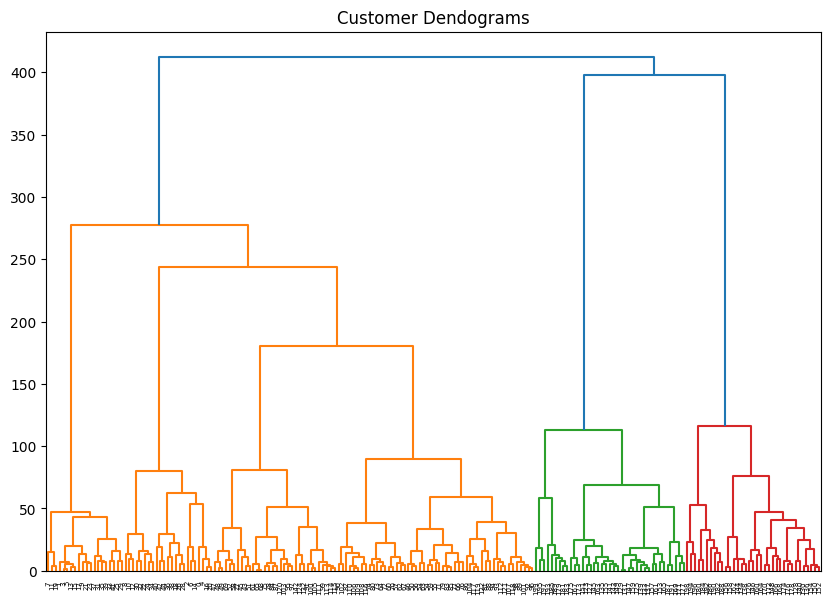

In [15]:
dataset = pd.read_csv('shopping-data.csv')
dataset = dataset.drop(['CustomerID', 'Genre'], axis=1)
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(dataset.iloc[:, 0:], method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'SSE')

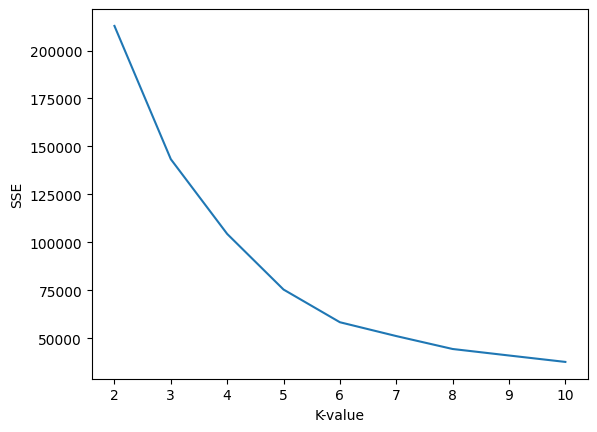

In [16]:
sse = []
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, random_state = 0)
 kmeans.fit(dataset.iloc[:, 0:])
 sse.append(kmeans.inertia_)

plt.plot(range(2,11), sse)
plt.xlabel('K-value')
plt.ylabel('SSE')

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [17]:
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset.iloc[:, 0:])

cluster.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7,
       1, 7, 1, 7, 1, 2, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 2,
       1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 4, 2, 4, 5, 4, 5, 4, 5, 4,
       2, 4, 5, 4, 5, 4, 5, 4, 5, 4, 2, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 3, 6, 3, 6, 3, 6, 3, 6, 4, 6, 3, 6, 4, 6, 3, 6, 3, 6, 3,
       6, 3])

#Finally,
Save a copy in your Github. Remember renaming the notebook.